In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### 1 Read

In [2]:
# nx.read_edgelist: reads a graph from a list of edges

In [3]:
G_fb= nx.read_edgelist("/Users/racheldyap/Desktop/DSF/Session 15/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [4]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


#### 2 Visualize (Graph Layout)

In [5]:
## nx.spring_layout: positions node? why? when to use this? dont understand why create this? 

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


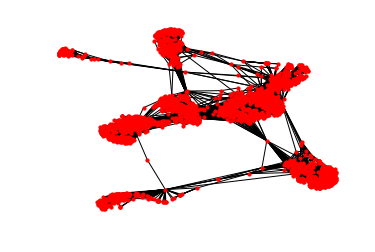

In [6]:
pos = nx.spring_layout(G_fb)

plt.axis("off")
nx.draw_networkx(G_fb, pos=pos, with_labels = False, linewidths=1,node_size=10)
plt.show()

In [7]:
class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())
 
    def is_connected(self, 
                     vertices_encountered = None, 
                     start_vertex=None):
        """ determines if the graph is connected """
        if vertices_encountered is None:
            vertices_encountered = set()
        gdict = self.__graph_dict        
        vertices = list(gdict.keys()) # "list" necessary in Python 3 
        if not start_vertex:
            # chosse a vertex from graph as a starting point
            start_vertex = vertices[0]
        vertices_encountered.add(start_vertex)
        if len(vertices_encountered) != len(vertices):
            for vertex in gdict[start_vertex]:
                if vertex not in vertices_encountered:
                    if self.is_connected(vertices_encountered, vertex):
                        return True
        else:
            return True
        return False
    
    def vertex_degree(self, vertex):
        """ The degree of a vertex is the number of edges connecting
            it, i.e. the number of adjacent vertices. Loops are counted 
            double, i.e. every occurence of vertex in the list 
            of adjacent vertices. """ 
        adj_vertices =  self.__graph_dict[vertex]
        degree = len(adj_vertices) + adj_vertices.count(vertex)
        return degree
    
    def find_isolated_vertices(self):
        """ returns a list of isolated vertices. """
        graph = self.__graph_dict
        isolated = []
        for vertex in graph:
            print(isolated, vertex)
            if not graph[vertex]:
                isolated += [vertex]
        return isolated
    
    def delta(self):
        """ the minimum degree of the vertices """
        min = 100000000
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree < min:
                min = vertex_degree
        return min
        
    def Delta(self):
        """ the maximum degree of the vertices """
        max = 0
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree > max:
                max = vertex_degree
        return max
    

In [12]:
graph = Graph(pos)

In [13]:
print("Vertices of graph:")
print(type(graph.vertices()))

Vertices of graph:
<class 'list'>


In [19]:
nx.average_shortest_path_length(G_fb)

3.6925068496963913

In [20]:
## is this the correct way to get min and max? not sure the error why it does not return count? when i check the type for graph, it is a list, but still get the attributeerror below? 

In [17]:
print(graph.delta())
print(graph.Delta())

AttributeError: 'numpy.ndarray' object has no attribute 'count'